In [1]:
!pip install scikit-learn

In [4]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale 
import random
import numpy as np 
import pandas as pd

In [5]:
#Create fake income/age clusters for N people in k clusters
def createClusteredData (N, k) :
    pointsPerCluster = float (N)/k
    X = []
    for i in range (k):
        incomeCentroid = random.uniform(20000.0, 200000.0) # Draw samples from a uniform distribution.
        # Samples are uniformly distributed over the half-open interval [Low, high) (includes low, but excludes high)
        ageCentroid = random.uniform(20.0, 70.0)
        X.append([incomeCentroid, ageCentroid])
        
        for j in range(int (pointsPerCluster) - 1):
            # normal: Draw random samples from a normal (Gaussian) distribution.
            # loc : Mean ("centre") of the distribution.
            # scale: Standard deviation (spread or "width") of the distribution. Must be non-negative.
            X.append([np.random.normal(loc = incomeCentroid, scale = 20000.0), np.random.normal(loc=ageCentroid, scale=2.0)])
    X = np. array (X)
    return X


**Why we should scale data?**


Scaling data is important in many machine learning algorithms because it ensures that each feature contributes equally to the analysis. Here are the key reasons for scaling data:

**Equalizing Feature Influence:** In many datasets, different features might be measured in different units and scales (e.g., kilograms, dollars, years). If one feature has a much larger scale than others, it can dominate the algorithm's behavior. Scaling normalizes these scales, so no single feature will unduly influence the model's outcome.
Improving Algorithm Performance: Many machine learning algorithms, like KMeans clustering, use distance calculations. If features are on different scales, distance metrics can be skewed towards features with larger scales. Scaling ensures that the distance measure accurately reflects differences in all dimensions.

**Speeding Up Convergence:** Algorithms that use gradient descent as an optimization technique (like neural networks and linear regression) converge faster when data is scaled. This is because scaling ensures a more balanced contribution of each feature to the loss gradient, avoiding erratic changes in the optimization path.

**Required by Some Models:** Certain algorithms, like Support Vector Machines and Principal Component Analysis, require scaled data to function correctly. These algorithms are sensitive to the scale of the input data, and without scaling, they might not perform as expected.

In [6]:
data = createClusteredData(100, 5)

In [5]:
print(data)

[[1.58751373e+05 2.94989737e+01]
 [1.54149394e+05 3.08827816e+01]
 [1.52402955e+05 2.89506370e+01]
 [1.83542940e+05 2.89670402e+01]
 [1.60487980e+05 2.98533609e+01]
 [1.41771944e+05 3.31312908e+01]
 [1.63821950e+05 2.80213429e+01]
 [1.50301396e+05 2.84741203e+01]
 [1.95383735e+05 2.65970497e+01]
 [1.44162249e+05 2.86395686e+01]
 [1.77570739e+05 2.97771399e+01]
 [1.63333992e+05 2.66199287e+01]
 [1.87720240e+05 2.89586355e+01]
 [1.53010211e+05 3.05947768e+01]
 [1.38888448e+05 2.91763803e+01]
 [1.67883004e+05 2.57686462e+01]
 [1.42946260e+05 3.22189361e+01]
 [1.31615624e+05 2.57626907e+01]
 [2.06010228e+05 3.13434392e+01]
 [1.54960778e+05 2.71085893e+01]
 [1.59359308e+05 3.51855819e+01]
 [1.29832041e+05 3.19316321e+01]
 [1.39811522e+05 3.78049882e+01]
 [1.53064219e+05 3.55504474e+01]
 [1.75549449e+05 3.50990719e+01]
 [1.85980408e+05 3.97701901e+01]
 [1.52040546e+05 4.12752425e+01]
 [2.08150259e+05 3.39880258e+01]
 [1.49781833e+05 3.40994310e+01]
 [1.51985985e+05 3.36883725e+01]
 [1.639043

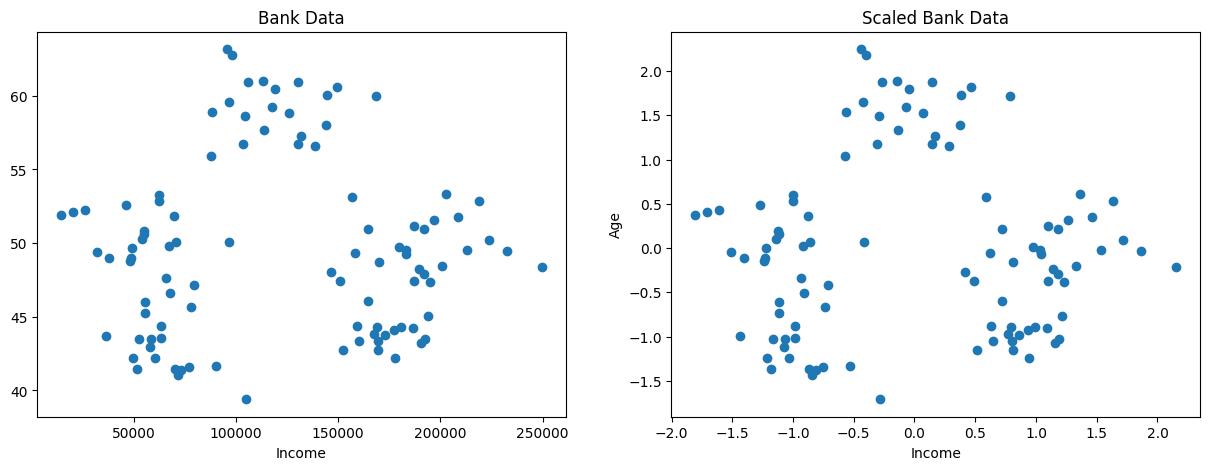

In [7]:
scaled_data = scale(data)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(data[:, 0], data[:, 1])
ax[0].set(xlabel ='Income', label= 'Age', title= "Bank Data")

ax[1].scatter(scaled_data[:, 0], scaled_data[:, 1])
ax[1].set(xlabel='Income', ylabel='Age', title="Scaled Bank Data")
plt.show()

### What is Inertia?

Inertia, in the context of KMeans implemented in libraries like scikit-learn, is a measure that represents the total sum of squared distances of each data point to the centroid of its assigned cluster. 

It's essentially the value of the objective function.
We would like this number to be as small as possible.

K that is equal to the number of samples have inertia=0

In [8]:
SSE = []
for cluster in range(1,20):
    model = KMeans(n_clusters = cluster, init='k-means++', n_init= 'auto') 
    model.fit(scaled_data)
    SSE.append(model.inertia_)

C:\Users\yubar\anaconda3\envs\spark_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yubar\anaconda3\envs\spark_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yubar\anaconda3\envs\spark_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yubar\anaconda3\envs\spark_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: 

In [9]:
print(SSE)

[200.0, 114.58453858078998, 44.78755864069148, 33.93397347439847, 19.007671464362424, 17.573990729708914, 14.325039083389207, 12.81058210980385, 11.774439257566922, 11.571264231207728, 9.413591843348495, 9.086362280847464, 7.794320159549745, 7.243192138778252, 6.08919548268965, 6.259868034625807, 5.095793456262257, 4.642641360362226, 4.698265712454285]


#### SSE stands for Sum of Squared Errors
which is a measure used to quantify the variance within the clusters formed by the KMeans algorithm.

For each iteration of the loop, a KMeans model is created with the following parameters:
**n_clusters = cluster:** The number of clusters to form, which changes with each iteration of the loop.

**init='k-means++':** This parameter specifies the initialization method for the centroids. 'k-means++' is an optimized version of the KMeans algorithm that selects initial cluster centers in a smart way to speed up convergence.

**n_init= 'auto':** This should be a numerical value indicating the number of times the algorithm will run with different centroid seeds. The final results will be the best output of these runs. The code might have a typo here, as 'auto' is not a valid value for n_init. Usually, a number like 10 is used.

**model.fit(scaled_data):** This fits the KMeans model to the scaled_data. scaled_data should be a preprocessed version of your dataset where features are scaled to ensure equal contribution to the model (commonly using standardization or normalization).

In [10]:
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE' :SSE})

In [11]:
plt.figure(figsize= (12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Inertia')

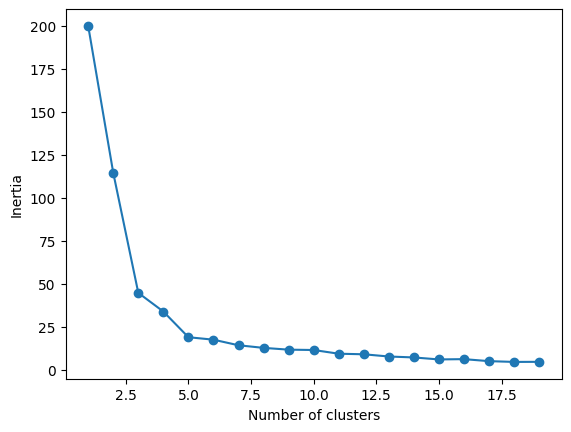

In [12]:
plt.plot(frame['Cluster'], frame['SSE'], marker='o') 
plt.xlabel('Number of clusters') 
plt.ylabel('Inertia') 

In [14]:
model = KMeans(n_clusters = 4)
#note I am scaling data to normalise it! Important for good results
model= model.fit(scale(data))

C:\Users\yubar\anaconda3\envs\spark_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
print(model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 0 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [16]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

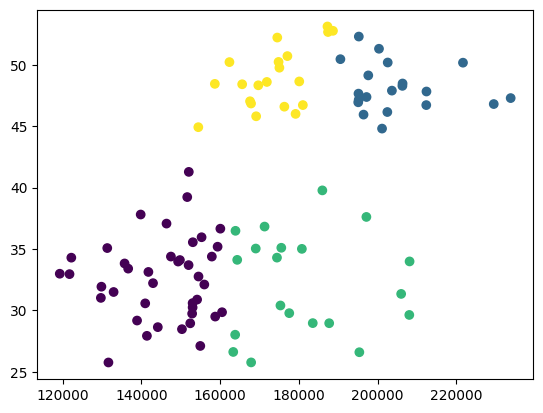

In [15]:
plt.scatter(data[:,0], data[:,1], c = model.labels_.astype(np.int64))